**Titanic Survival**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
training_set = pd.read_csv('Train_Titanic.csv')

In [3]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
training_set.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [5]:
survived = training_set[training_set['Survived']==1]
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [6]:
nosurvived = training_set[training_set['Survived']==0]
nosurvived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
print('Total = ',len(training_set))

Total =  891


In [8]:
print('% of survived = ',(len(survived)/len(training_set))*100, '%')

% of survived =  38.38383838383838 %


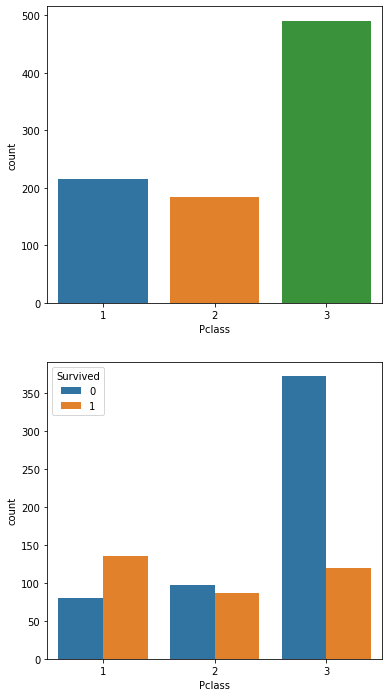

In [9]:
plt.figure(figsize=[6,12]) #figure size
plt.subplot(211) #row=2,#col=1,fig 1
sns.countplot(x = 'Pclass', data = training_set)
plt.subplot(212) #row=2,#col=1,fig 2
sns.countplot(x = 'Pclass',hue='Survived', data = training_set)

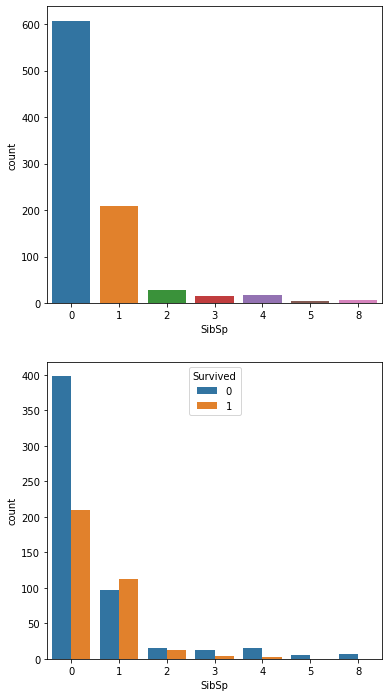

In [10]:
plt.figure(figsize=[6,12]) #figure size
plt.subplot(211) #row=2,#col=1,fig 1
sns.countplot(x = 'SibSp', data = training_set)
plt.subplot(212) #row=2,#col=1,fig 2
sns.countplot(x = 'SibSp',hue='Survived', data = training_set)

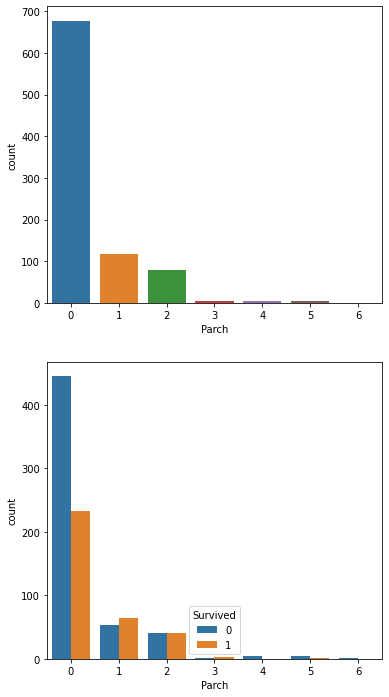

In [11]:
plt.figure(figsize=[6,12]) #figure size
plt.subplot(211) #row=2,#col=1,fig 1
sns.countplot(x = 'Parch', data = training_set)
plt.subplot(212) #row=2,#col=1,fig 2
sns.countplot(x = 'Parch',hue='Survived', data = training_set)

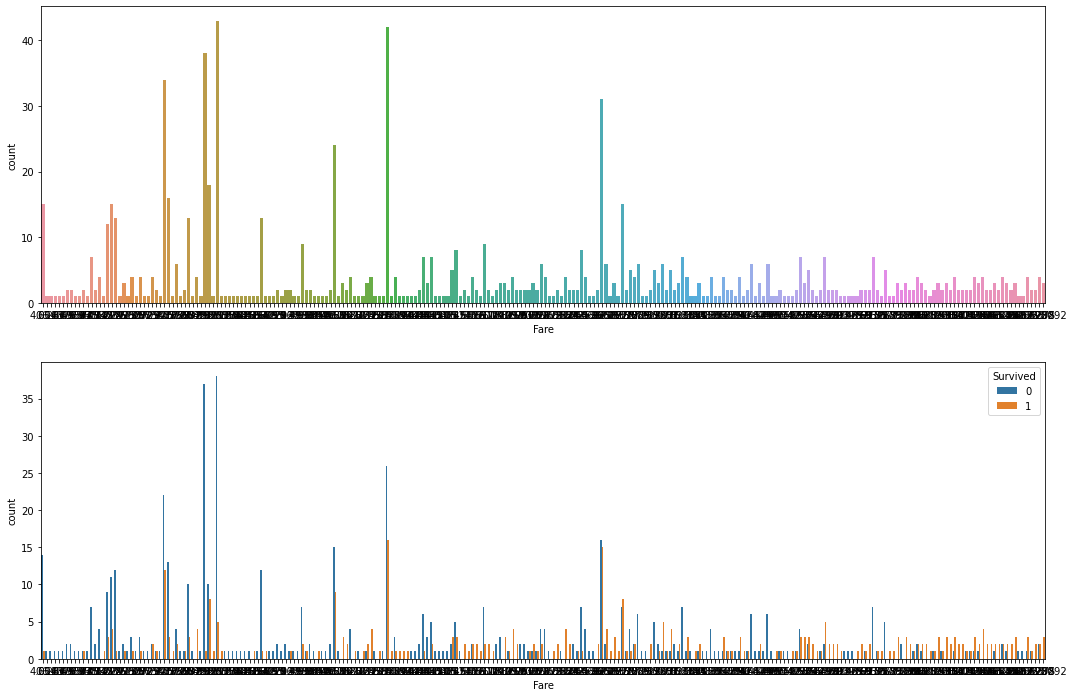

In [12]:
plt.figure(figsize=[18,12]) #figure size
plt.subplot(211) #row=2,#col=1,fig 1
sns.countplot(x = 'Fare', data = training_set)
plt.subplot(212) #row=2,#col=1,fig 2
sns.countplot(x = 'Fare',hue='Survived', data = training_set)

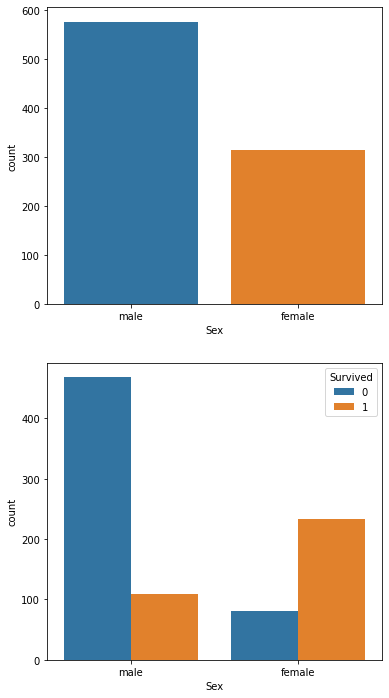

In [13]:
plt.figure(figsize=[6,12]) #figure size
plt.subplot(211) #row=2,#col=1,fig 1
sns.countplot(x = 'Sex', data = training_set)
plt.subplot(212) #row=2,#col=1,fig 2
sns.countplot(x = 'Sex',hue='Survived', data = training_set)

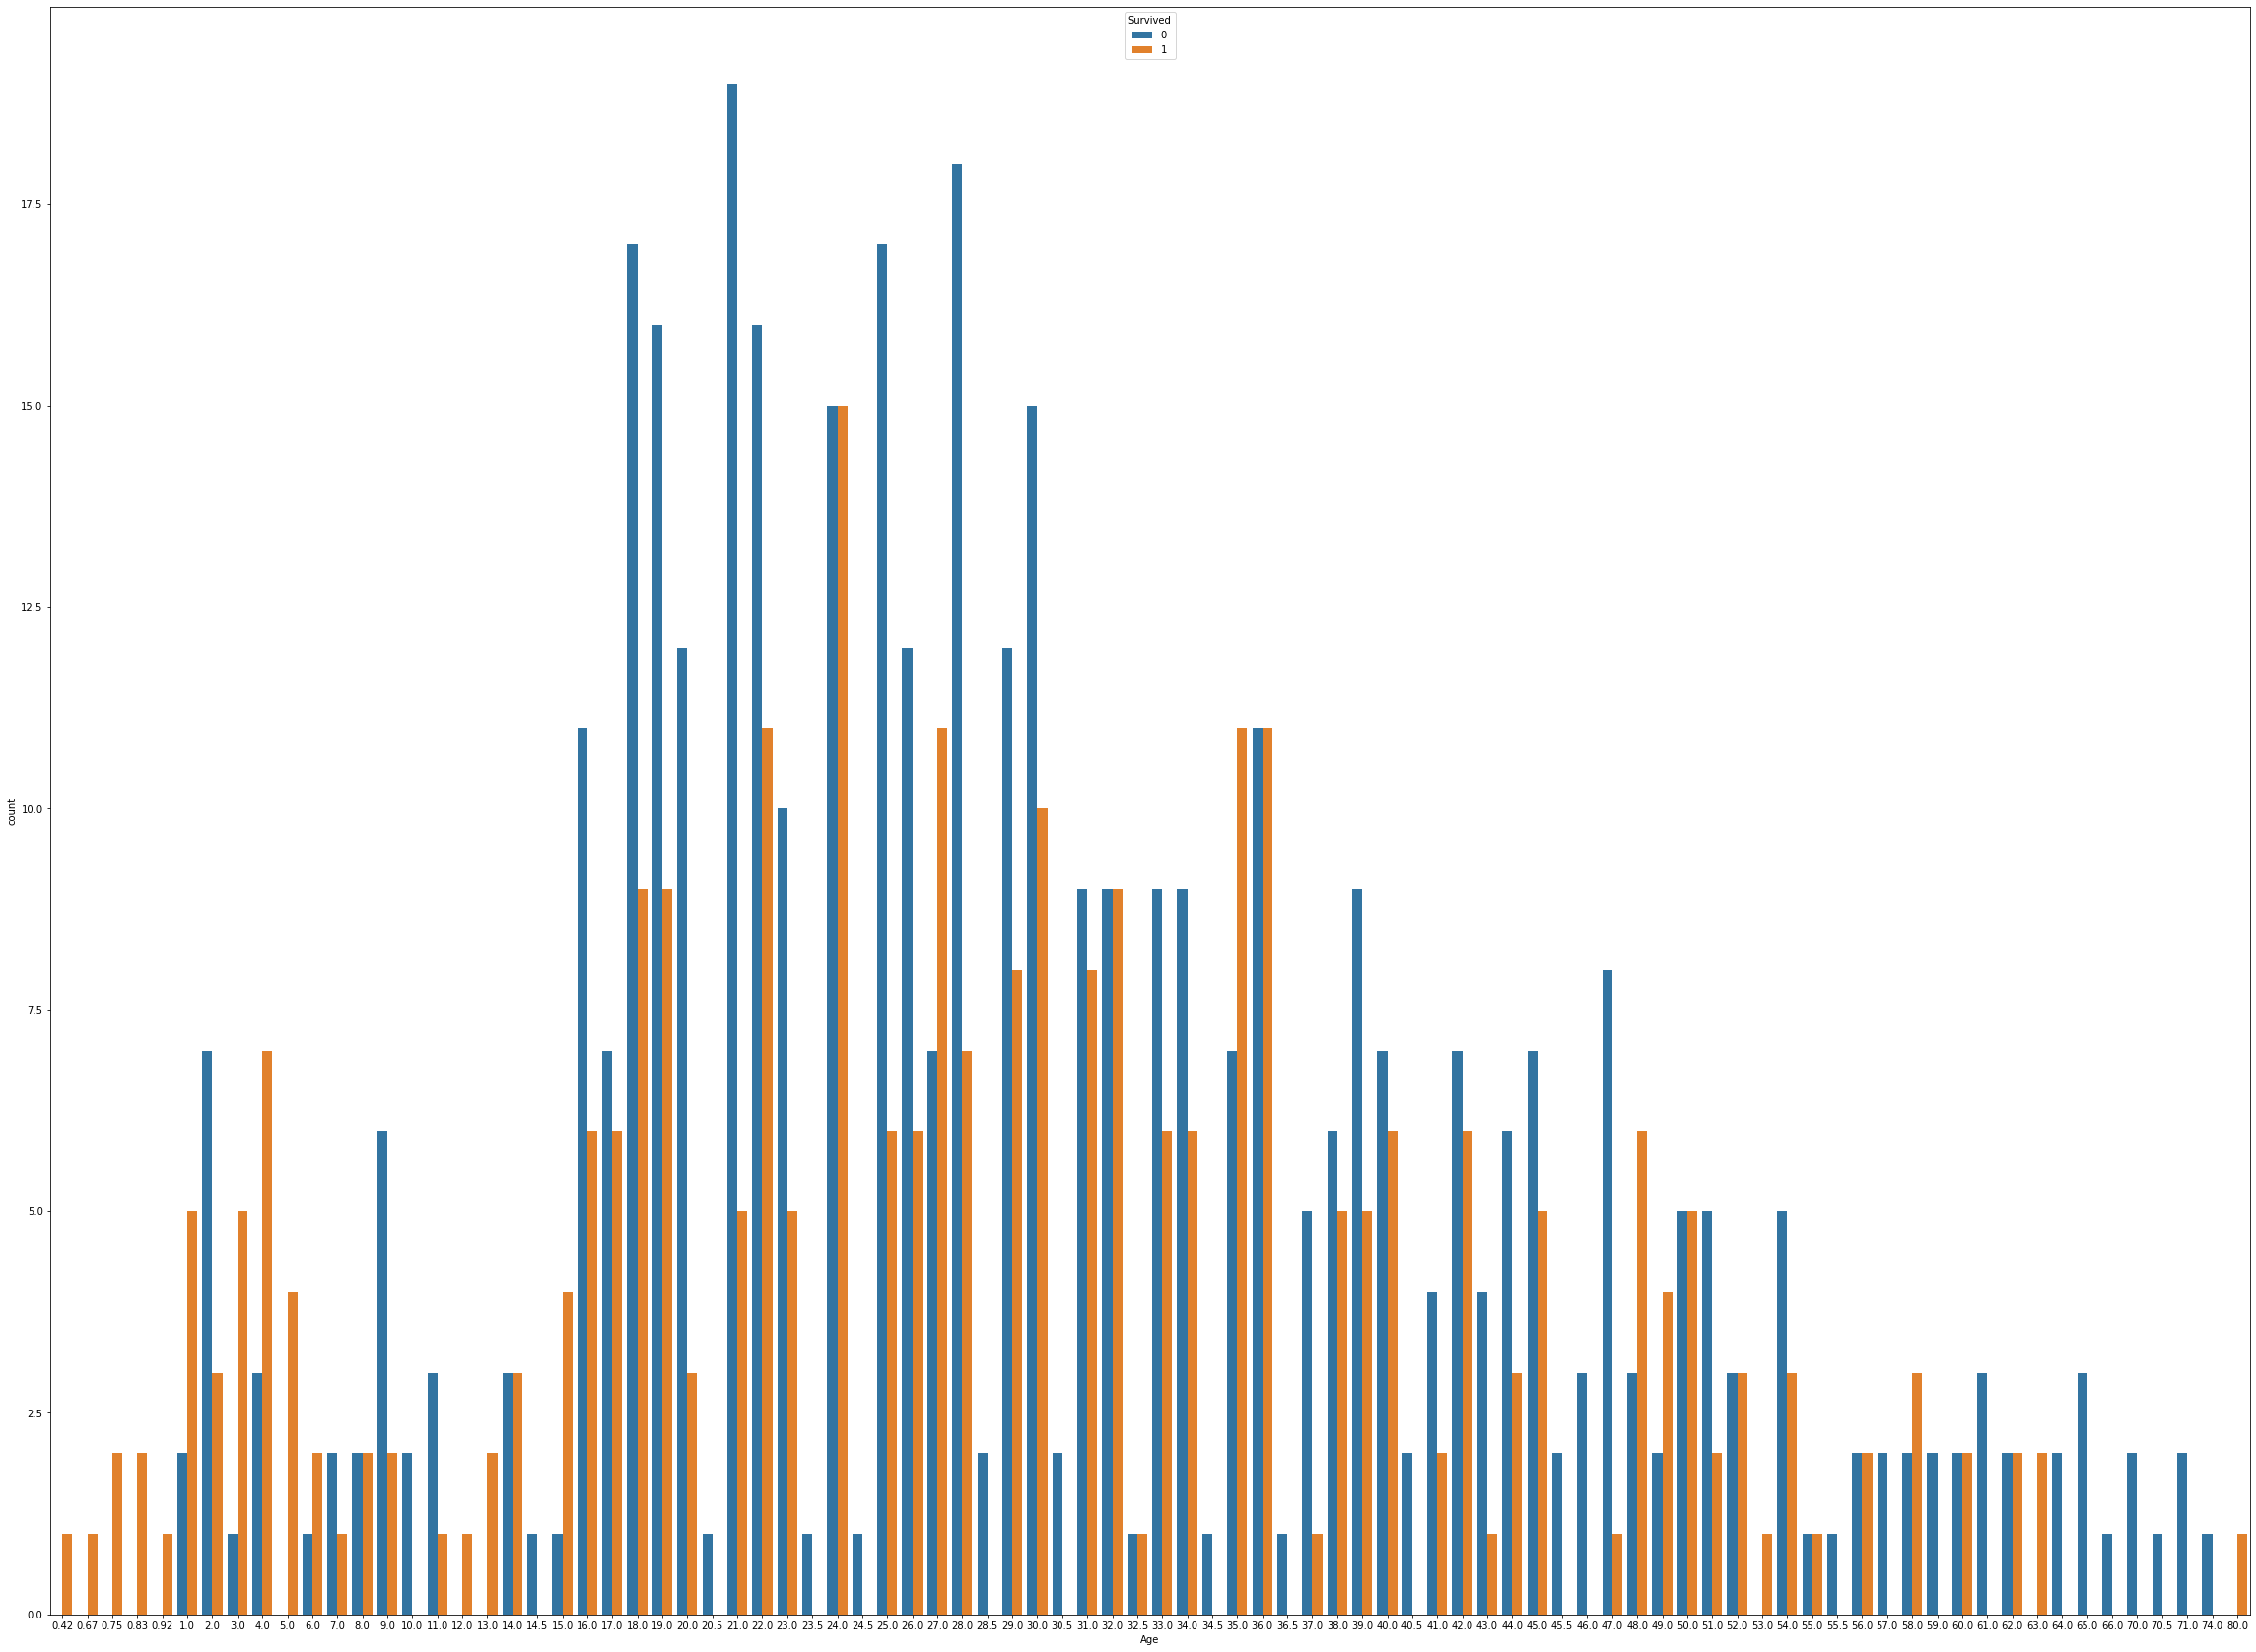

In [14]:
plt.figure(figsize=(40,30))
sns.countplot(x= 'Age',hue='Survived',data= training_set)

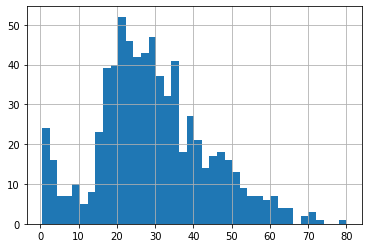

In [15]:
training_set['Age'].hist(bins=40)

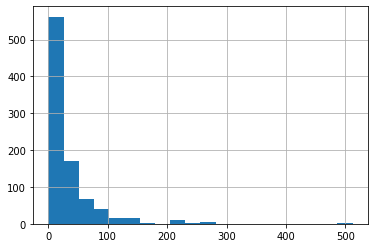

In [16]:
training_set['Fare'].hist(bins=20)

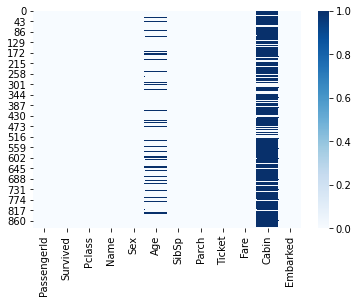

In [17]:
sns.heatmap(training_set.isnull(), cmap='Blues')

In [18]:
training_set.drop('Cabin',axis=1,inplace=True)

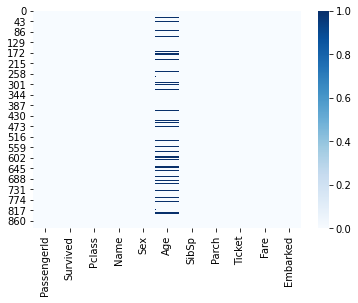

In [19]:
sns.heatmap(training_set.isnull(), cmap='Blues')

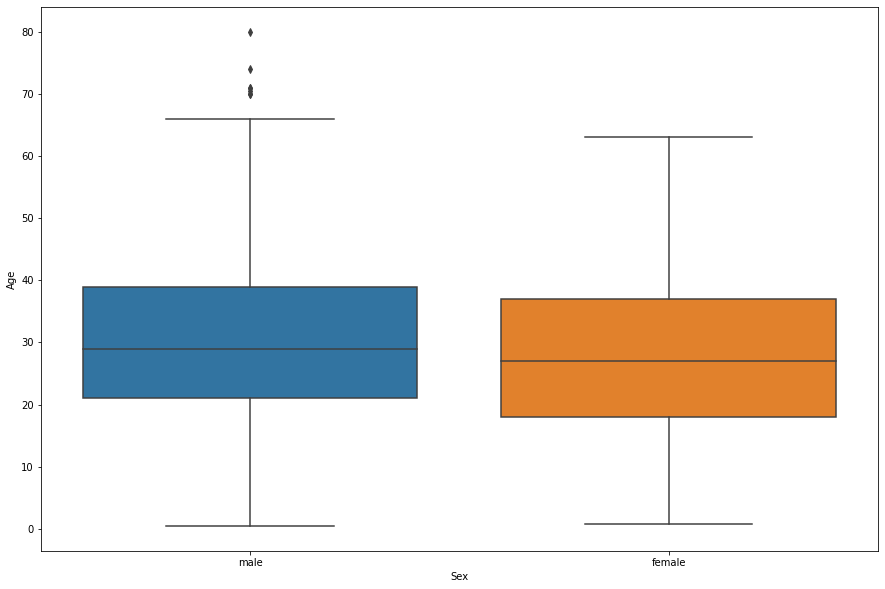

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Sex',y='Age',data=training_set)

Now,
because we have missing data in age so we plot the avarage age for each and we found that the avg age for male is about 28 and 25 for women so we can fill the missing data with these avgs

In [21]:
def Fill_age(data):
  age=data[0]
  sex=data[1]
  if pd.isnull(age):
    if sex is 'male':
      return 29
    else:
        return 25
  else:
   return age       

In [22]:
training_set['Age']=training_set[['Age','Sex']].apply(Fill_age,axis=1)  #axis=1 means do for whole colomn

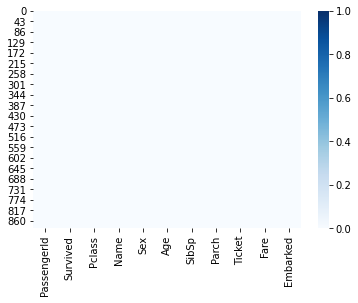

In [23]:
sns.heatmap(training_set.isnull(),cmap='Blues')

Now , drop all useless colomn

In [24]:
training_set.drop(['Name','Ticket','Embarked','PassengerId'],axis=1,inplace=True)

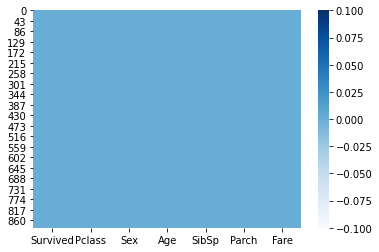

In [25]:
sns.heatmap(training_set.isnull(),cmap='Blues')

Now , we will change the words(male,female) to values(0 or 1)

In [26]:
pd.get_dummies(training_set['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Now we have two opposite colomn and we need just one so we will drop one

In [27]:
male=pd.get_dummies(training_set['Sex'],drop_first=True)

now we need to remove sex colomn and replace it with male colomn

In [28]:
training_set.drop(['Sex'],axis=1,inplace=True)

In [30]:
training_set=pd.concat([training_set,male],axis=1)

In [31]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


#Now , Let's training
we put all colomns as input except (survived) because it actually the output, also we put(values) because we need the values not the data frame so we convert it.

In [35]:
X= training_set.drop('Survived', axis=1).values 
y= training_set['Survived'].values

In [38]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) #we use random state to make sure that we will face the same results

In [41]:
X_train.shape

(179, 6)

In [42]:
X_test.shape

(179, 6)

In [45]:
y_train.shape

(712,)

In [46]:
y_test.shape

(179,)

In [47]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression()
Classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_predict_test = Classifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

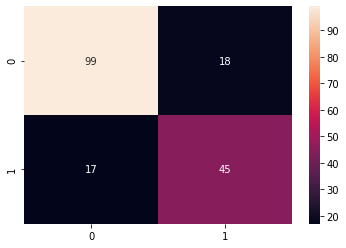

In [51]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [52]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179

